In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [4]:
file_path = 'hi2013_usace_ncmp_maui_lmsl_Job940964.txt'
data = pd.read_csv(file_path, sep=',', header=None)
data.columns = ['Longitude', 'Latitude', 'Elevation']

In [5]:
data['Elevation'] = pd.to_numeric(data['Elevation'], errors='coerce')
data = data.dropna(subset=['Elevation'])

In [6]:
print(data.head())


      Longitude    Latitude  Elevation
1  -156.3770975  20.9214429      32.75
2  -156.3770276  20.9213682      34.13
3  -156.3771359  20.9214588      32.23
4  -156.3770074  20.9213434      35.08
5  -156.3771197  20.9213952      32.98


In [7]:
file_path = 'hi2013_usace_ncmp_maui_lmsl_Job940964.txt'
data = pd.read_csv(file_path, sep=',', header=None)
data.columns = ['Longitude', 'Latitude', 'Elevation']

In [8]:
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
data['Elevation'] = pd.to_numeric(data['Elevation'], errors='coerce')

In [9]:
data = data.dropna(subset=['Longitude', 'Latitude', 'Elevation'])

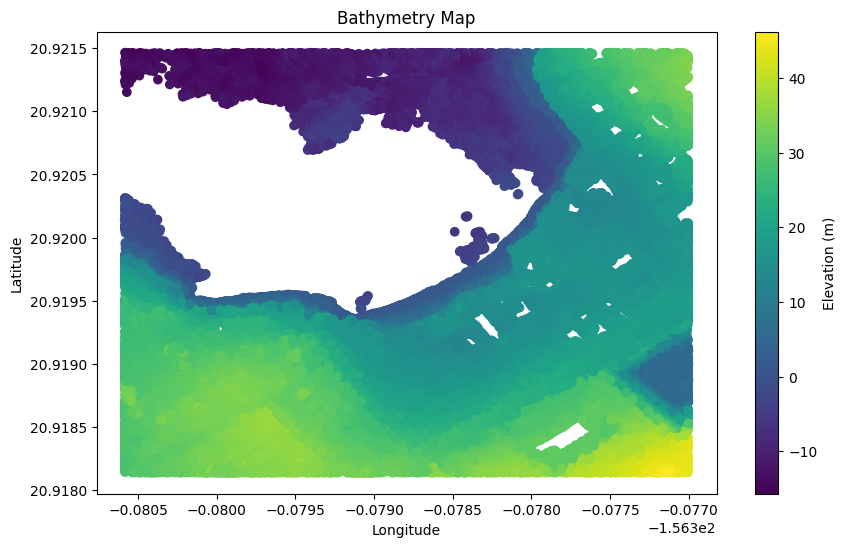

In [10]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(data['Longitude'], data['Latitude'], c=data['Elevation'], cmap='viridis', marker='o')
plt.colorbar(sc, label='Elevation (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bathymetry Map')
plt.show()

In [13]:
import numpy as np


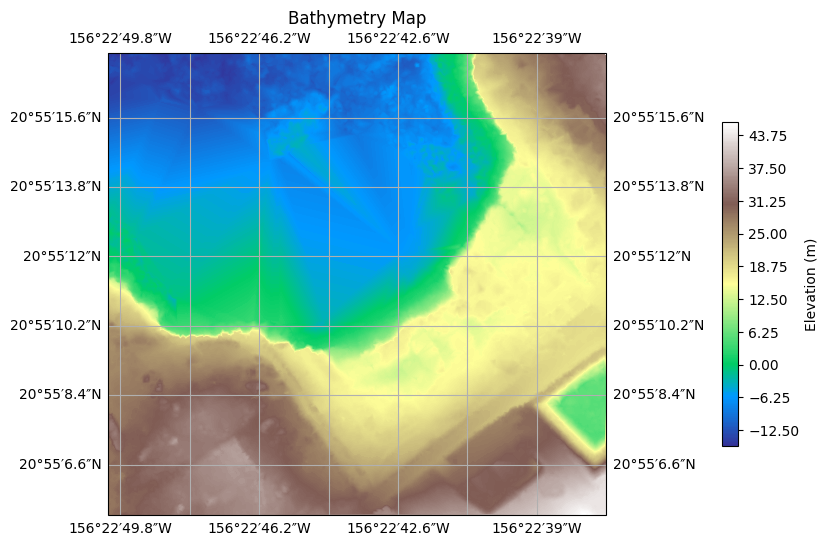

In [21]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

grid_x, grid_y = np.mgrid[
    data['Longitude'].min():data['Longitude'].max():1000j, 
    data['Latitude'].min():data['Latitude'].max():1000j
]
grid_z = griddata(
    (data['Longitude'].values, data['Latitude'].values),  # points
    data['Elevation'].values,  # values
    (grid_x, grid_y), method='linear'
)

cmap = plt.cm.terrain 

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([
    data['Longitude'].min(), data['Longitude'].max(), 
    data['Latitude'].min(), data['Latitude'].max()
], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')

contourf = ax.contourf(grid_x, grid_y, grid_z, 256, transform=ccrs.PlateCarree(), cmap=cmap)

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

cbar = plt.colorbar(contourf, orientation='vertical', shrink=0.7, pad=0.15, aspect=20)
cbar.set_label('Elevation (m)')

plt.title('Bathymetry Map')
plt.show()
